# 在线沙盘
用Python在局域网建立Sever，可供其他电脑访问。

## 用户访问http://192.168.1.4:5000
上传cvs文件，Python服务器收到后，把数据读取出来，做成网页返回给用户

In [12]:
from flask import Flask, request, render_template
import pandas as pd

#app = Flask(__name__)
app = Flask(__name__, template_folder='templates')

@app.route("/", methods=["GET", "POST"])
def upload_csv():
    if request.method == "POST":
        # 获取上传的文件
        file = request.files["file"]
        # 将文件读取为DataFrame
        df = pd.read_csv(file)
        # 生成HTML表格
        html = df.to_html()
        # 显示表格
        return render_template('table.html', table_html=html)
    else:
        return '''
        <!doctype html>
        <html>
        <body>
            <h1>Upload a CSV file</h1>
            <form method="post" enctype="multipart/form-data">
                <input type="file" name="file">
                <input type="submit" value="Upload">
            </form>
        </body>
        </html>
        '''

if __name__ == "__main__":
    app.run(host="192.168.1.4", port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.1.4:5000/ (Press CTRL+C to quit)
192.168.1.4 - - [05/May/2023 23:34:39] "GET / HTTP/1.1" 200 -
192.168.1.4 - - [05/May/2023 23:34:53] "POST / HTTP/1.1" 200 -


## 在表格上方增加散点图

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.1.4:5000/ (Press CTRL+C to quit)
192.168.1.4 - - [06/May/2023 00:48:54] "GET / HTTP/1.1" 200 -
192.168.1.4 - - [06/May/2023 00:49:01] "POST / HTTP/1.1" 200 -


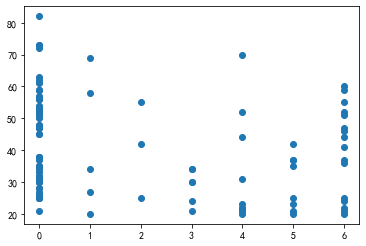

In [30]:
from flask import Flask, request, render_template
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

#app = Flask(__name__)
app = Flask(__name__, template_folder='templates')

@app.route("/", methods=["GET", "POST"])
def upload_csv():
    if request.method == "POST":
        # 获取上传的文件
        file = request.files["file"]
        # 将文件读取为DataFrame
        df = pd.read_csv(file)
        # 绘制散点图
        fig, ax = plt.subplots()
        ax.scatter(df.iloc[:, 11], df.iloc[:, 3])
        # 将图表保存为PNG文件
        file_path = os.path.join(app.root_path, "image", "scatter.png")
        plt.savefig(file_path, format='png')
        # 将图表保存为二进制流
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        # 将二进制流转换为base64编码字符串
        image_string = base64.b64encode(buffer.read()).decode()
        # 生成HTML，显示散点图
        html = '<img src="data:image/png;base64,{0}">'.format(image_string)
        # 生成HTML表格
        table_html = df.to_html()
        # 显示散点图和表格
        return render_template('chart_table.html', chart_html=html, table_html=table_html)
    else:
        return '''
        <!doctype html>
        <html>
        <body>
            <h1>Upload a CSV file</h1>
            <form method="post" enctype="multipart/form-data">
                <input type="file" name="file">
                <input type="submit" value="Upload">
            </form>
        </body>
        </html>
        '''

if __name__ == "__main__":
    app.run(host="192.168.1.4", port=5000)


In [29]:
from flask import Flask, request, render_template
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64
import os

#app = Flask(__name__)
app = Flask(__name__, template_folder='templates')

@app.route("/", methods=["GET", "POST"])
def upload_csv():
    if request.method == "POST":
        # 获取上传的文件
        file = request.files["file"]
        # 将文件读取为DataFrame
        df = pd.read_csv(file)
        # 获取用户输入的x轴对应的列名
        x_col = request.form["x_col"]
        if x_col == "":
            x_col = 11
        # 绘制散点图
        fig, ax = plt.subplots()
        ax.scatter(df[x_col], df.iloc[:, 3])
        # 将图表保存为PNG文件
        file_path = os.path.join(app.root_path, "image", "scatter.png")
        plt.savefig(file_path, format='png')
        # 将图表保存为二进制流
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        # 将二进制流转换为base64编码字符串
        image_string = base64.b64encode(buffer.read()).decode()
        # 生成HTML，显示散点图和输入框
        html = f'''
            <img src="data:image/png;base64,{image_string}">
            <form method="post" enctype="multipart/form-data">
                <label for="x_col">x轴列名：</label>
                <input type="text" id="x_col" name="x_col">
                <input type="submit" value="重新绘制散点图">
            </form>
        '''
        # 生成HTML表格
        table_html = df.to_html()
        # 显示散点图和表格
        return render_template('chart_table.html', chart_html=html, table_html=table_html)
    else:
        return '''
        <!doctype html>
        <html>
        <body>
            <h1>Upload a CSV file</h1>
            <form method="post" enctype="multipart/form-data">
                <input type="file" name="file">
                <input type="submit" value="Upload">
            </form>
        </body>
        </html>
        '''

if __name__ == "__main__":
    app.run(host="192.168.1.4", port=5000)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.1.4:5000/ (Press CTRL+C to quit)
192.168.1.4 - - [06/May/2023 00:45:31] "GET / HTTP/1.1" 200 -
192.168.1.4 - - [06/May/2023 00:45:37] "POST / HTTP/1.1" 400 -
192.168.1.4 - - [06/May/2023 00:45:46] "GET / HTTP/1.1" 200 -
192.168.1.4 - - [06/May/2023 00:45:53] "POST / HTTP/1.1" 400 -
